## Spam Folder Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("mail_data.csv")


In [3]:
dataset.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
dataset.duplicated().sum()

np.int64(415)

In [8]:
dataset.drop_duplicates(inplace=True)

## Preprocess the Data
### Rename columns and convert labels:

In [9]:
dataset['Category'].count()

np.int64(5157)

In [10]:
dataset.columns = ['label','message']

In [11]:
dataset['label']=dataset['label'].map({'ham':1,'spam':0})

In [12]:
dataset.head()

,label,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


## split the data

In [13]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,-1].values # last column
y=dataset.iloc[:,:-1].values # start first column to end before last column 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (4125,) (4125, 1)
Test shape: (1032,) (1032, 1)


In [15]:
print(y)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [16]:
import re
import nltk
from nltk.corpus import stopwords

#  Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Cp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#  Custom Preprocessing Function with Lemmatization

In [18]:
lemmatizer = WordNetLemmatizer()
custom_words = set(stopwords.words('english')).union({'subject', 'regarding', 'please', 'thanks'})


def custom_preproccessor(text):
    text = re.sub('[a-zA-Z]',' ',text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in custom_words]
    return ' '.join(words)
    
X_cleaned = [custom_preproccessor(msg) for msg in X]

## Build and train pipeline

In [21]:
vectorizer = TfidfVectorizer()
model = MultinomialNB()

X_vec = vectorizer.fit_transform(X_cleaned)
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model.fit(X_train_vec, y_train.ravel())


MultinomialNB()

# Evaluate

In [22]:
y_predict = model.predict(X_test_vec)
print("Accuracy Score", accuracy_score(y_test,y_predict))
print("\n Classification Report: ",classification_report(y_test,y_predict))

Accuracy Score 0.8827519379844961

 Classification Report:                precision    recall  f1-score   support

           0       1.00      0.11      0.20       136
           1       0.88      1.00      0.94       896

    accuracy                           0.88      1032
   macro avg       0.94      0.56      0.57      1032
weighted avg       0.90      0.88      0.84      1032



Spam vs ham

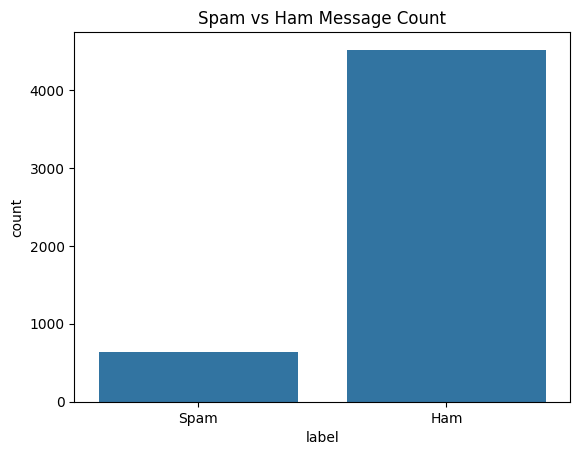

In [23]:
sns.countplot(x='label', data=dataset)
plt.xticks([0, 1], ['Spam', 'Ham'])
plt.title('Spam vs Ham Message Count')
plt.show()

## Confusion metrix

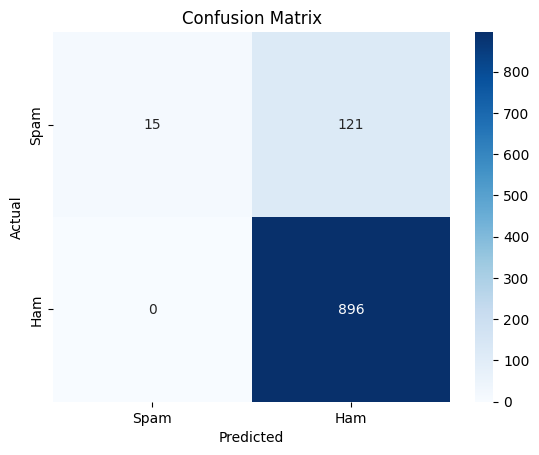

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()